In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/rw_Zip_Codes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37218,NASHVILLE,None,55,{3CB897BE-ACCB-46CB-BA4E-6F5E39D6C451},None,None,None,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
1,37080,JOELTON,None,32,{C63ADE44-CC5E-4CCD-BBF0-4B8A64864B42},None,None,None,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
2,37027,BRENTWOOD,None,44,{8846D4AC-5F8A-4434-8348-C9A28297FA4E},None,None,None,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ..."
3,37086,LA VERGNE,None,5,{1618FE99-089D-4ED0-BAFA-C29A19596F3D},None,None,None,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ..."
4,37219,NASHVILLE,None,15,{B531C81C-3919-4059-8444-23F5F0684ECA},None,None,None,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

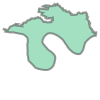

In [5]:
zipcodes.loc[0,'geometry']

In [6]:
print(zipcodes.loc[0,'geometry'])

MULTIPOLYGON (((-86.88231470485501 36.262480354493, -86.882699985096 36.261485812789, -86.883117190452 36.261269226955, -86.883025614362 36.261238589246, -86.882548952688 36.26108228847, -86.881189972437 36.260636656103, -86.879272070205 36.260444050326, -86.87882462272 36.258881935271, -86.878711032129 36.258485362966, -86.87859742202799 36.258088712826, -86.87714422149401 36.257708094959, -86.877129756743 36.257688420802, -86.876634492889 36.256977787607, -86.876636188644 36.256977775304, -86.876604134915 36.256931583679, -86.876446616656 36.256704173744, -86.876252949552 36.256428127529, -86.87610714741901 36.256217390174, -86.875978613035 36.256034546553, -86.875777054059 36.255750041546, -86.875718778768 36.25566366072, -86.875363605291 36.254952004985, -86.875022914166 36.255059957892, -86.87388991158799 36.255413184469, -86.872985075529 36.255296657705, -86.872859638289 36.253515292224, -86.872153325485 36.252944618317, -86.872254269824 36.251515432502, -86.872273095737 36.25125

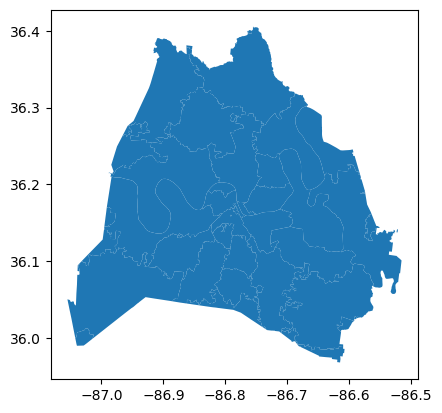

In [7]:
zipcodes.plot();

In [19]:
water_fountains = gpd.read_file('../maps/water_fountains.geojson')
print(water_fountains.crs)
water_fountains.head( )

epsg:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [20]:
water_fountains.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


In [25]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
fountains_geo= gpd.GeoDataFrame(water_fountains, 
                                crs = zipcodes.crs,
                               geometry = water_fountains['geometry'])

In [27]:
type(fountains_geo)

geopandas.geodataframe.GeoDataFrame

In [29]:
zipcodes = zipcodes[['zipcode', 'poname', 'geometry']]

In [30]:
fountains_by_zip = gpd.sjoin(fountains_geo, zipcodes, op = 'within')

C:\Users\Rebecca Wolfe\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [31]:
fountains_by_zip.head()

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,zipcode,poname
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),1,37080,JOELTON
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),19,37221,NASHVILLE
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310),19,37221,NASHVILLE
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),19,37221,NASHVILLE
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),19,37221,NASHVILLE


In [32]:
fountains_by_zip['zipcode'].value_counts()

37209    8
37221    8
37201    6
37206    6
37208    5
37207    5
37214    4
37013    4
37212    3
37218    3
37210    2
37205    2
37213    2
37228    2
37204    2
37217    2
37211    2
37203    2
37076    1
37216    1
37115    1
37215    1
37080    1
Name: zipcode, dtype: int64

In [37]:
fountains_in_37206 = fountains_by_zip.loc[fountains_by_zip['zipcode'] == '37206']
fountains_in_37206.shape

(6, 13)

In [40]:
polygon37206 = zipcodes.loc[zipcodes['zipcode'] == '37206']
polygon37206.shape

(1, 3)

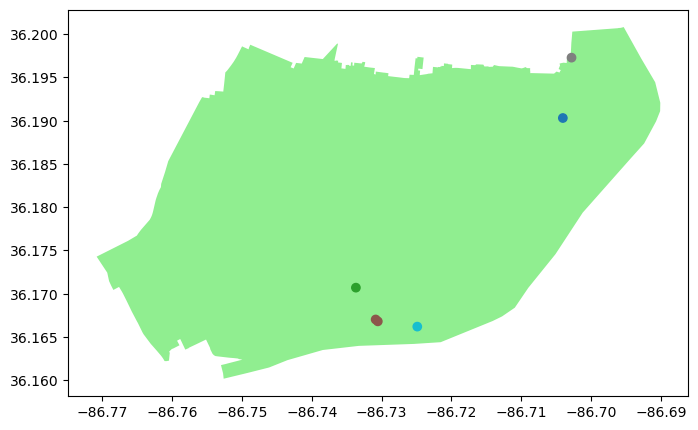

In [41]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
fountains_in_37206.plot( ax = ax, column = 'location');
plt.show();

In [42]:
polygon37206.geometry.centroid

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_21016\4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


33    POINT (-86.73098 36.18090)
dtype: geometry

In [45]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37206.geometry.centroid[33]
print(center)

POINT (-86.7309830626016 36.1808969092208)


C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_21016\1631534227.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid[33]


In [46]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.1808969092208, -86.7309830626016]


In [47]:
#create our map of Nashville Zip Code 37207 and show it
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

In [54]:
i = 0
for row_index, row_values in fountains_in_37206.iterrows():
    if i <6: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 10
values are:
 
name                        Shelby Dog Park Water Fountain
location                                          Dog Park
dog                                                      Y
objectid                                             46200
lon                                            36.17068627
ada                                                      N
cnt                                                      1
lat                                           -86.73369208
feat_type                       Standard/ADA/Bottle Filler
geometry       POINT (-86.7336920807119 36.17068627396349)
index_right                                             33
zipcode                                              37206
poname                                           NASHVILLE
Name: 10, dtype: object
------------------------- 
index is 12
values are:
 
name                          Shelby Bottoms Water Fountain
location                                          Trailhead
dog       

In [55]:
#draw our zip code area: 37207
map_37206 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in fountains_in_37206.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37206)
map_37206.save('../maps/map37206.html')

#display our map
map_37206

In [52]:
cluster_map_37206 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37206)

folium.GeoJson(polygon37206).add_to(cluster_map_37206)

# inside the loop add each marker to the cluster
for row_index, row_values in fountains_in_37206.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['location'])
    icon=folium.Icon(color="blue",icon="fountain", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37206.save('../maps/cluster37206.html')

cluster_map_37206 